In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import torch
import numpy as np
import random

# torch.manual_seed(111)
# torch.cuda.manual_seed(111)
# np.random.seed(111)
# random.seed(111)
# torch.backends.cudnn.enabled=False
torch.backends.cudnn.deterministic=True

In [3]:
ncc = 2
n_epochs = 5
bn_size = 200

In [4]:

start_time = time.time()
%run autoenc_br.py --epochs {n_epochs} --connected_components {ncc} --dataset colmnist --regularizer svd --bn_size {bn_size} --n_workers 0
print("--- %s seconds ---" % (time.time() - start_time))
#torch.save(trainer.model, "colmnist_disent_100.pt")

Batch 1, training loss 0.3170, val loss 0.3061, block_reg 0.94, dropout rate 0.50
Pruned to 199 neurons
Pruned to 198 neurons
Batch 101, training loss 0.0698, val loss 0.0634, block_reg 0.93, dropout rate 0.50
Pruned to 197 neurons
Batch 201, training loss 0.0550, val loss 0.0554, block_reg 0.90, dropout rate 0.50
Pruned to 196 neurons
Batch 301, training loss 0.0445, val loss 0.0451, block_reg 0.89, dropout rate 0.50
Pruned to 195 neurons
Batch 401, training loss 0.0403, val loss 0.0361, block_reg 0.89, dropout rate 0.50
Pruned to 194 neurons
Batch 501, training loss 0.0359, val loss 0.0357, block_reg 0.87, dropout rate 0.50
Pruned to 193 neurons
Batch 601, training loss 0.0338, val loss 0.0319, block_reg 0.87, dropout rate 0.50
Pruned to 192 neurons
Batch 701, training loss 0.0307, val loss 0.0298, block_reg 0.86, dropout rate 0.50
Pruned to 191 neurons
Batch 801, training loss 0.0309, val loss 0.0278, block_reg 0.86, dropout rate 0.50
Pruned to 190 neurons
Batch 901, training loss 0

Pruned to 117 neurons
Batch 1801, training loss 0.0120, val loss 0.0113, block_reg 0.71, dropout rate 0.50
Pruned to 116 neurons
Train epoch 4, loss 0.012992972553273042
Batch 1, training loss 0.0132, val loss 0.0100, block_reg 0.70, dropout rate 0.50
Pruned to 115 neurons
Pruned to 114 neurons
Batch 101, training loss 0.0128, val loss 0.0096, block_reg 0.70, dropout rate 0.50
Pruned to 113 neurons
Batch 201, training loss 0.0115, val loss 0.0089, block_reg 0.70, dropout rate 0.50
Pruned to 112 neurons
Batch 301, training loss 0.0131, val loss 0.0101, block_reg 0.70, dropout rate 0.50
Pruned to 111 neurons
Batch 401, training loss 0.0119, val loss 0.0086, block_reg 0.70, dropout rate 0.50
Pruned to 110 neurons
Batch 501, training loss 0.0118, val loss 0.0087, block_reg 0.70, dropout rate 0.50
Pruned to 109 neurons
Batch 601, training loss 0.0139, val loss 0.0108, block_reg 0.69, dropout rate 0.50
Pruned to 108 neurons
Batch 701, training loss 0.0137, val loss 0.0079, block_reg 0.69, dr

In [5]:
# start_time = time.time()
# %run autoenc_baseline.py --epochs {n_epochs} --dataset colmnist --bn_size {bn_size} --n_workers 0
# print("--- %s seconds ---" % (time.time() - start_time))
# torch.save(trainer.model, "colmnist_not_disent.pt")

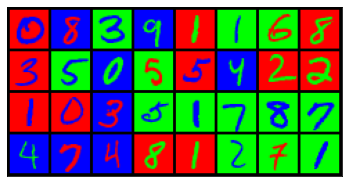

Image shape: torch.Size([3, 28, 28])


In [6]:
from plotting_utils import show_dataset_examples
show_dataset_examples(trainer)

In [7]:
from plotting_utils import get_test_sample
test_examples = get_test_sample(trainer)

In [8]:
(len(trainer.train_loader)/trainer.batch_size)

58.59375

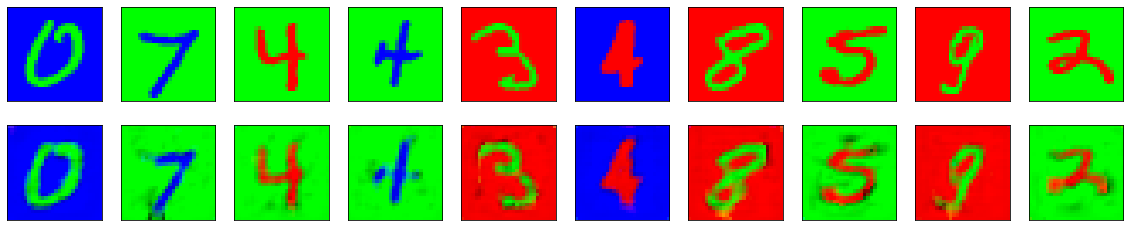

In [9]:
from plotting_utils import show_reconstruction
show_reconstruction(test_examples, trainer)

In [10]:
ncc = 2

In [11]:
from models import block_regularizer
block_regularizer(trainer.model.encoder_output_layer, ncc)

tensor(0.6794, device='cuda:0', grad_fn=<RsubBackward1>)

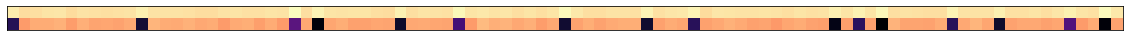

In [12]:
from models import layer_svd
import matplotlib.pyplot as plt

enc_layer = trainer.model.encoder_output_layer
u, s, v = layer_svd(enc_layer)
u = u.detach().cpu().numpy()
s = s.detach().cpu().numpy()
v = v.detach().cpu().numpy()
plt.figure(figsize=(20, 20))
plt.imshow(u[:, :ncc].transpose(1, 0), cmap="magma")

In [13]:
from models import compute_layer_blocks_out, compute_layer_blocks_in
blocks = compute_layer_blocks_out(enc_layer, ncc)
len(blocks)
print(blocks)

tensor([ 1,  0, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,  0, -1, -1,
        -1,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,  1,  0, -1, -1, -1,  0,
         0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  1, -1, -1,
        -1, -1,  0,  1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,
         0,  1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1,  0,  0,  1,  0,  0, -1,
         0, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  1, -1, -1, -1, -1,
        -1,  0,  0, -1, -1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0, -1,  0, -1,
         0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        -1,  0, -1, -1, -1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  1, -1,  0,
         0, -1,  0, -1,  0,  0,  1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,
         1,  0, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0, -1,  1,  0,  0,  1,  0,
        -1, -1], dtype=torch.int32)


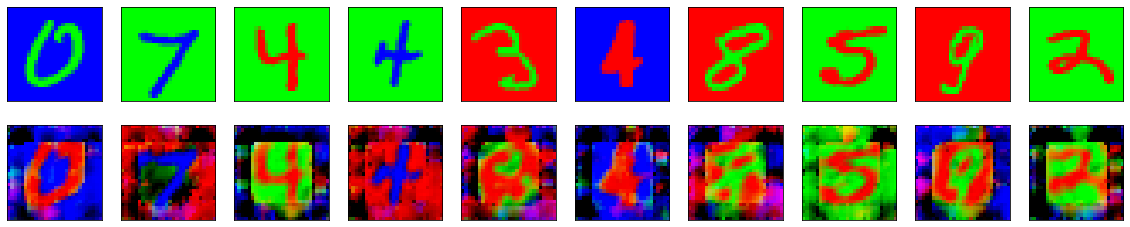

tensor([False,  True, False, False, False, False, False, False,  True, False,
         True, False,  True, False, False,  True, False, False, False,  True,
        False, False,  True,  True, False, False, False,  True,  True, False,
        False,  True, False, False, False,  True,  True, False,  True,  True,
        False,  True,  True,  True,  True,  True, False,  True, False, False,
         True, False, False, False, False, False,  True, False, False, False,
        False,  True, False, False,  True, False, False, False,  True,  True,
        False,  True,  True, False, False, False, False, False,  True, False,
         True, False, False, False,  True,  True, False,  True,  True, False,
         True, False, False,  True, False,  True, False,  True, False,  True,
        False,  True, False, False, False, False, False, False, False,  True,
         True, False, False,  True,  True,  True,  True, False,  True,  True,
         True, False,  True, False,  True, False,  True,  True, 

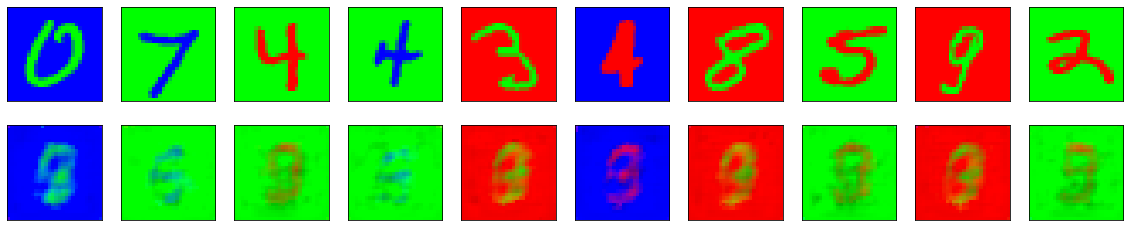

tensor([ True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False,  True, False, False, False, False, False, False, 

In [14]:
from plotting_utils import plot_reconstruction

for c in range(max(blocks)+1):
    plt.figure(figsize=(20, 20)) 
    plt.imshow([blocks.numpy()==c], cmap='magma')
    enc_layer.turn_output_neurons_off(blocks==c)
    
    show_reconstruction(test_examples, trainer)
    
    print(enc_layer.out_mask)
    enc_layer.turn_all_output_neurons_on()

In [15]:
trainer.model

AE(
  (encoder_0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (encoder_1): Sequential(
    (0): ReLU(inplace=True)
    (1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (2): ReLU(inplace=True)
  )
  (encoder_hidden_layer): Linear(in_features=6400, out_features=1024, bias=True)
  (encoder_output_layer): DisentangledLinear(in_features=1024, out_features=200, bias=True)
  (block_dropout_1): BlockDropout(
    p=0.5, inplace=False
    (layer): DisentangledLinear(in_features=1024, out_features=200, bias=True)
  )
  (decoder_hidden_layer): DisentangledLinear(in_features=200, out_features=1024, bias=True)
  (block_dropout_2): BlockDropout(
    p=0.5, inplace=False
    (layer): DisentangledLinear(in_features=200, out_features=1024, bias=True)
  )
  (decoder_output_layer): Linear(in_features=1024, out_features=6400, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 3, kerne

In [16]:

def plot_blocked_weights(layer):
    plt.figure(figsize=(20, 7))
    blocks_in = compute_layer_blocks_in(layer, ncc)
    blocks_out = compute_layer_blocks_out(layer, ncc)
    plt.imshow(layer.weight[np.argsort(blocks_out)][:, np.argsort(blocks_in)].cpu().detach().numpy(), cmap='magma')
    plt.show()


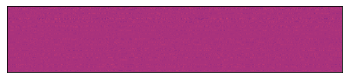

In [17]:
new_weight = np.zeros(enc_layer.weight.shape)
blocks_out = compute_layer_blocks_out(enc_layer, ncc)
blocks_in = compute_layer_blocks_in(enc_layer, ncc)
for i in range(ncc):
    mask = np.ones(enc_layer.weight.shape, dtype=bool)
    mask[blocks_out!=i] = 0
    mask[:, blocks_in!=i] = 0
    new_weight[mask] = enc_layer.weight.detach().cpu()[mask]
    
plt.imshow(new_weight, cmap='magma')

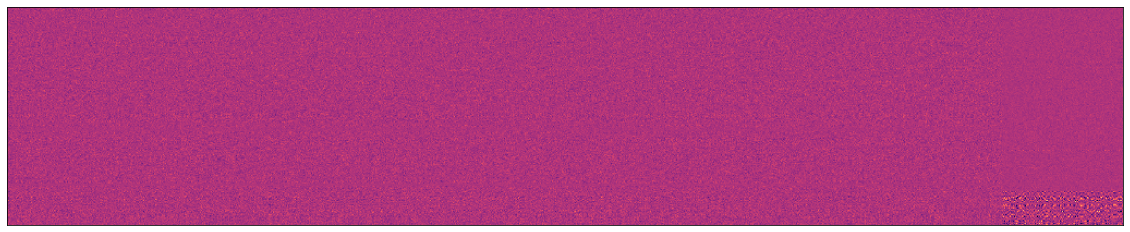

In [18]:
plot_blocked_weights(enc_layer)

In [19]:
enc_layer.weight = nn.Parameter(torch.tensor(new_weight).cuda().float())

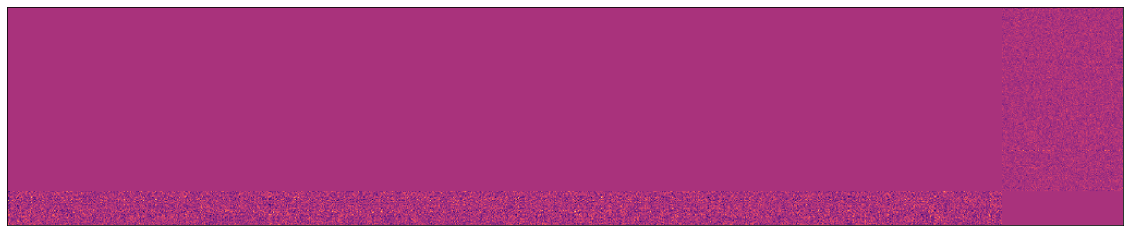

In [20]:
plot_blocked_weights(enc_layer)

In [21]:
np.where(blocks==0)

(array([  0,   2,   9,  13,  15,  16,  27,  28,  29,  31,  35,  41,  44,
         50,  53,  62,  64,  65,  68,  69,  71,  72,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  89,  90,  92,  93, 100, 101, 103, 105,
        108, 115, 116, 119, 121, 124, 125, 127, 130, 131, 137, 138, 139,
        147, 149, 151, 153, 154, 155, 157, 160, 162, 165, 166, 167, 171,
        173, 174, 175, 176, 178, 180, 182, 183, 186, 187, 188, 190, 192,
        193, 198]),)

In [22]:
for c in range(ncc):
    print("block {}".format(c))
    for n in np.where(blocks==c)[0]:
        mask = torch.zeros(60, dtype=torch.float)
        mask[n] = 1
        print(n)
        enc_layer.turn_output_neurons_off(mask)

        with torch.no_grad():
            reconstruction = trainer.model(test_examples)
        plot_reconstruction(test_examples.detach(), reconstruction.detach().cpu())
        print(trainer.criterion(test_examples, reconstruction))
        enc_layer.turn_all_output_neurons_on()

block 0
0


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
relative_error = [None]*bn_size
for c in range(ncc):
    mask = torch.zeros(60, dtype=torch.float)
    mask[blocks==c] = 1
    enc_layer.turn_output_neurons_off(mask)
    with torch.no_grad():
        reconstruction = trainer.model(test_examples)
    block_error = trainer.criterion(test_examples, reconstruction).item()
    enc_layer.turn_all_output_neurons_on()
        
    #print("block {}".format(c))
    for n in np.where(blocks!=c)[0]:
        mask = torch.zeros(60, dtype=torch.float)
        mask[blocks==c] = 1
        mask[n] = 1
        #print(n)
        #plt.figure(figsize=(20, 20)) 
        #plt.imshow(mask.unsqueeze(0), cmap='magma')
        enc_layer.turn_output_neurons_off(mask)

        with torch.no_grad():
            reconstruction = trainer.model(test_examples)
        #plot_reconstruction(test_examples.detach(), reconstruction.detach().cpu())
        relative_error[n] = block_error - trainer.criterion(test_examples, reconstruction).item()
        enc_layer.turn_all_output_neurons_on()

In [ ]:
relative_error

In [ ]:

plt.figure()
plt.hist(np.array(relative_error)[blocks==0])
plt.figure()
plt.hist(np.array(relative_error)[blocks==1])
thr = np.percentile(np.array(relative_error), 20)
re_mask = np.array([e>thr for e in relative_error])
re_mask.sum()

In [ ]:
for c in range(ncc):
    mask = np.logical_and(np.array(blocks==c), re_mask)
    plt.figure(figsize=(20, 20)) 
    plt.imshow(torch.tensor(mask).unsqueeze(0), cmap='magma')
    enc_layer.turn_output_neurons_off(mask)
    
    show_reconstruction(test_examples, trainer)
    enc_layer.turn_all_output_neurons_on()

In [ ]:
srt_enc = np.argsort(v.transpose(1, 0)[:, 1]).tolist()
srt_hidden = np.argsort(u.transpose(1, 0)[:, 1]).tolist()

trainer.model.set_mask(None)

w1 = trainer.model.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]


In [ ]:
srt_enc

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')

In [ ]:
binned_examples = [[[] for _ in range(3)] for _ in range(10)]
for batch_features in trainer.test_loader:
    batch_features, (digit, _, clr) = batch_features
    for i in range(len(batch_features)):
        binned_examples[digit[i].item()][clr[i].item()].append(batch_features[i].to(device))

In [ ]:
for d in range(10):
    for clr in range(3):
        binned_examples[d][clr] = torch.stack(binned_examples[d][clr]).to(device)
        print(binned_examples[d][clr].shape)

In [ ]:
losses = []
for _ in range(ncc):
    losses.append(torch.zeros((3, 10)))
    
for c in range(ncc):
    mask = torch.zeros(w.shape)
    mask.shape
    mask[blocks==c] = 1
    plt.figure(figsize=(20, 20)) 
    plt.imshow(mask[:, :1].transpose(1, 0), cmap='magma')
    trainer.model.set_mask(mask)
    
    for clr in range(3):
        for d in range(10):
            with torch.no_grad():
                reconstruction = trainer.model(binned_examples[d][clr]).cpu()
            show_reconstruction(binned_examples[d][clr], reconstruction)
            losses[c][clr][d] = trainer.criterion(binned_examples[d][clr], reconstruction.cuda())

In [ ]:

for c in range(ncc):
    plt.grid(False)
    plt.imshow(losses[c], cmap="magma")
    plt.show()
    print(losses[c])

           

In [ ]:
print(losses[0].sum(0))
print(losses[0].sum(1))
print(losses[1].sum(0))
print(losses[1].sum(1))

In [ ]:
def block_dropout(blocks, prob):
    mask = torch.zeros(len(blocks), dtype=torch.bool)
    first_mask = torch.rand(((blocks==0).sum(), )) < prob
    mask[blocks==0] = first_mask
    p = first_mask.sum()/len(first_mask)
    for i in range(1, max(blocks)+1):
        new_mask = torch.zeros(((blocks==i).sum(), ), dtype=torch.bool)
        new_mask[:int(p*len(new_mask))] = 1
        mask[blocks==i] = new_mask[torch.randperm(len(new_mask))]

    return mask.float()

block_dropout(blocks, 0.2)

In [ ]:
b_test = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
for i in range(20):
    d = block_dropout(b_test, 0.3)
    print(d[:8].sum().item(), d[8:].sum().item())
    print(d)

# T-SNE

In [15]:
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [16]:
# Utility function to visualize the outputs of PCA and t-SNE
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [17]:
embeddings = []
targets = []
d_targets = []
c_targets = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features.cuda()).cpu()
        embeddings.append(trainer.model.embedding)
        d_targets.extend(digit.tolist())
        c_targets.extend(clr.tolist())
        #targets.extend([str(d)+"_"+str(c) for d, c in zip(digit.tolist(), clr.tolist())])

In [18]:
df_emb = torch.vstack(embeddings).detach().cpu().numpy()
targets = [c*10+d for d, c in zip(d_targets, c_targets)]

In [19]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_emb)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 3.195s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.953061
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.580421
[t-SNE] KL divergence after 300 iterations: 2.636311
t-SNE done! Time elapsed:

/tmp/ipykernel_13618/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(10.2975445, 1.4547741, '0'),
  Text(3.268454, 1.4519638, '1'),
  Text(5.482188, 1.2967681, '2'),
  Text(7.4597235, 1.273346, '3'),
  Text(4.5266957, -1.8141414, '4'),
  Text(5.384597, 0.7680596, '5'),
  Text(7.3226514, 3.8866808, '6'),
  Text(2.255516, -1.9915171, '7'),
  Text(5.6086926, 0.541041, '8'),
  Text(4.247834, -1.710644, '9'),
  Text(3.254794, 7.5214767, '10'),
  Text(-2.322308, 5.746776, '11'),
  Text(-0.4156742, 5.1072073, '12'),
  Text(-2.0940874, 6.7280593, '13'),
  Text(-2.8839092, 3.487791, '14'),
  Text(-0.044687442, 5.946653, '15'),
  Text(-7.23562, 3.4842691, '16'),
  Text(-1.1009574, 4.250143, '17'),
  Text(-3.9765878, 5.8351436, '18'),
  Text(-2.8756852, 3.2981615, '19'),
  Text(-9.167433, -4.566994, '20'),
  Text(-1.0720333, -6.584283, '21'),
  Text(-0.26252156, -8.449316, '22'),
  Text(0.27355555, -7.16293, '23'),
  Text(0.44265577, -4.250931, '24'),
  Text(-4.490977, -5.7935424, '25'),
  Text(-7.0928617

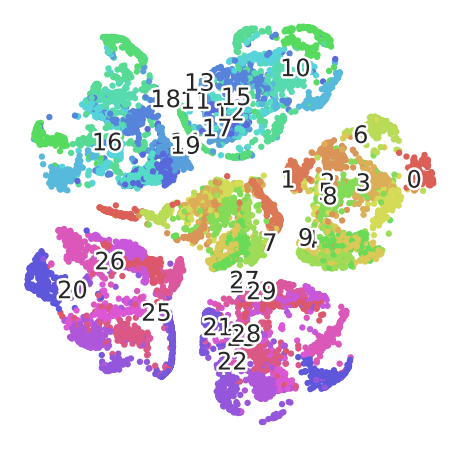

In [20]:
fashion_scatter(tsne_results, np.array(targets))


/tmp/ipykernel_13618/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(4.0423427, 0.21659178, '0'),
  Text(-2.2404685, 5.3934917, '1'),
  Text(-2.2796893, -5.7041326, '2')])

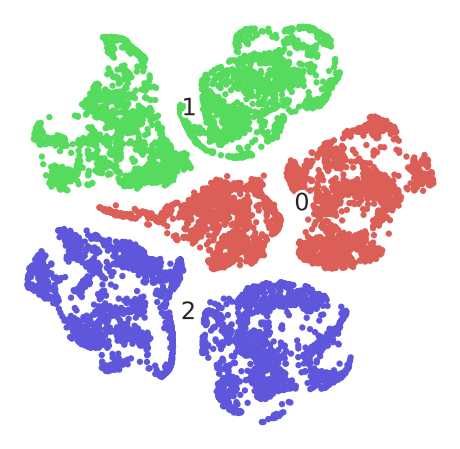

In [21]:
fashion_scatter(tsne_results, np.array(c_targets))

/tmp/ipykernel_13618/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-4.752252, 0.25576472, '0'),
  Text(-0.7485234, 1.3979976, '1'),
  Text(-0.02070942, 1.056989, '2'),
  Text(1.4291868, 1.2940993, '3'),
  Text(0.55865765, -1.746952, '4'),
  Text(0.70103383, 0.92852926, '5'),
  Text(-1.9196603, 1.5574377, '6'),
  Text(0.91480625, -1.9494705, '7'),
  Text(0.67251754, 0.41780132, '8'),
  Text(0.64221483, -1.7098525, '9')])

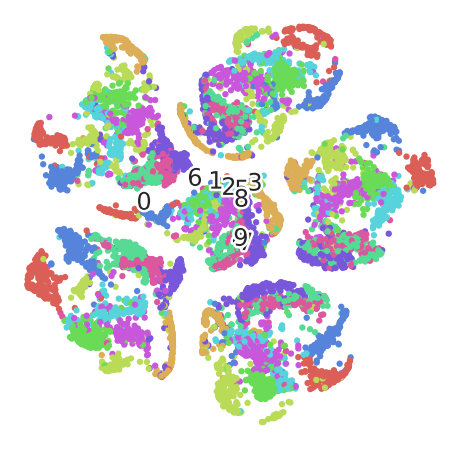

In [22]:
fashion_scatter(tsne_results, np.array(d_targets))

In [23]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_block0 = tsne.fit_transform(df_emb[:, blocks==0])
tsne_results_block1 = tsne.fit_transform(df_emb[:, blocks==1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 2.606s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.177266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.125549
[t-SNE] KL divergence after 300 iterations: 2.950817
[t-SNE] Computing 121 nea

/tmp/ipykernel_13618/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(2.3855486, 3.725963, '0'),
  Text(1.4155167, -0.0486863, '1'),
  Text(-3.6260946, -3.59055, '2')])

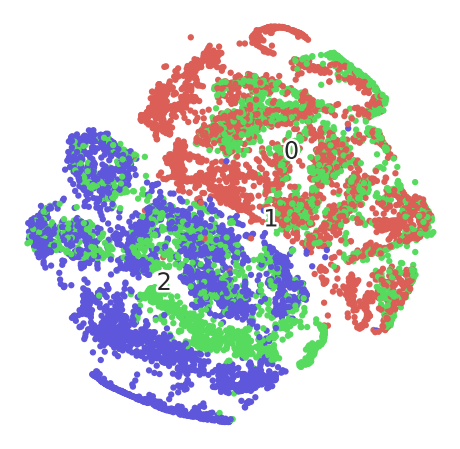

In [24]:
fashion_scatter(tsne_results_block0, np.array(c_targets))

/tmp/ipykernel_13618/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-4.899127, 1.4800696, '0'),
  Text(3.0639923, 6.1256537, '1'),
  Text(2.277527, 0.39491922, '2'),
  Text(-0.17571363, 0.14867851, '3'),
  Text(-2.4643304, -3.5579405, '4'),
  Text(-0.8691546, 0.14902657, '5'),
  Text(-6.1439633, -0.3585794, '6'),
  Text(0.44689167, 5.146138, '7'),
  Text(-0.11857493, -0.65860784, '8'),
  Text(-2.3734922, -0.5818066, '9')])

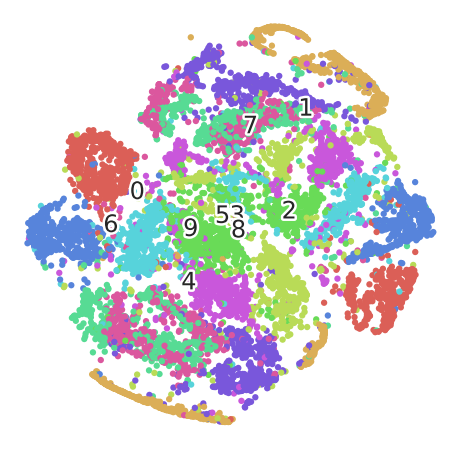

In [25]:
fashion_scatter(tsne_results_block0, np.array(d_targets))

/tmp/ipykernel_13618/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(6.6703196, -2.7444913, '0'),
  Text(-2.8514576, -3.2032568, '1'),
  Text(-2.6782548, 6.8242016, '2')])

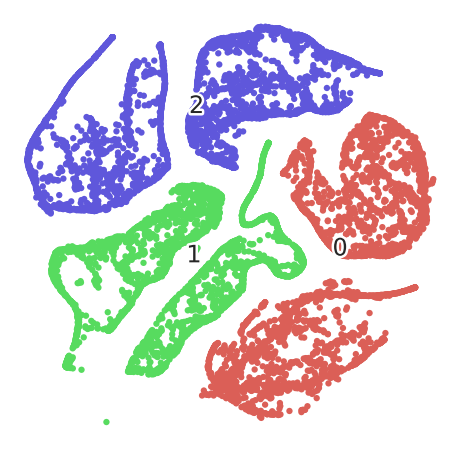

In [26]:
fashion_scatter(tsne_results_block1, np.array(c_targets))

/tmp/ipykernel_13618/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(1.7170072, 1.2052317, '0'),
  Text(-1.8873107, -2.0242403, '1'),
  Text(0.29381257, 0.29793134, '2'),
  Text(-0.06828467, 0.5381745, '3'),
  Text(0.09260206, 0.03404167, '4'),
  Text(0.31941712, -0.20535144, '5'),
  Text(1.612613, -0.26922446, '6'),
  Text(-0.56242204, -0.5307244, '7'),
  Text(-0.27055845, 1.0987695, '8'),
  Text(0.17718887, 0.90956795, '9')])

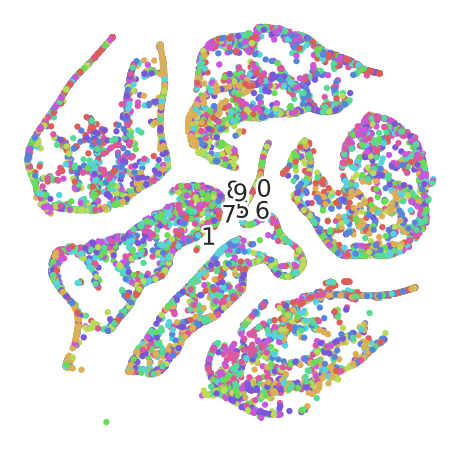

In [27]:
fashion_scatter(tsne_results_block1, np.array(d_targets))

# Dependencies between blocks

In [ ]:
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(20, 20)) 
plt.imshow(np.cov(df_emb[:, blocks==0].transpose(1, 0)))
plt.colorbar()

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow(np.cov(df_emb[:, blocks==1].transpose(1, 0)))
plt.colorbar()

In [ ]:
full_corr = np.corrcoef(df_emb[:, blocks==0].transpose(1, 0), df_emb[:, blocks==1].transpose(1, 0))
plt.figure(figsize=(20, 20)) 
plt.imshow(full_corr)
plt.colorbar()

In [ ]:
full_corr = np.corrcoef(df_emb[:, blocks==0].transpose(1, 0), df_emb[:, blocks==1].transpose(1, 0))
plt.figure(figsize=(20, 20)) 
plt.imshow(full_corr)
plt.colorbar()

In [ ]:
dist = np.zeros((bn_size, bn_size))
for i in range(bn_size):
    for j in range(i, bn_size):
        dist[i, j] = np.abs(full_corr[i]-full_corr[j]).sum()
        dist[j, i] = np.abs(full_corr[i]-full_corr[j]).sum()
        
plt.figure(figsize=(20, 20)) 
plt.imshow(dist<5)
plt.colorbar()

plt.figure(figsize=(20, 20)) 
plt.hist(dist.flatten())

# Collect activations

In [ ]:
from explainn_code.grab_functions import db_from_dat_with_labels, write_pic_as_sets

activations = []
test_data = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features).cpu()
        activations.append(trainer.model.layer_0_out.detach().cpu().numpy())
        test_data.append(batch_features.detach().cpu().numpy())
activations = np.concatenate(activations)


In [ ]:
for i in range(6):
    write_pic_as_sets(activations[:, i, :].reshape(activations.shape[0], -1), "filters_{}.dat".format(i))

In [ ]:
test_data = np.concatenate(test_data)
write_pic_as_sets(test_data.reshape(test_data.shape[0], -1), "test_data.dat")

In [ ]:
for i in range(6):
    db_from_dat_with_labels("filters_{}.dat".format(i), "test_data.dat", "data{}.db".format(i))